# Exploratory Data Analysis (EDA) – AI4I 2020 Predictive Maintenance

## Objective
Explore distributions, relationships, and differences between failure and non-failure cases to identify potential data quality issues and candidate drivers of machine failure.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 5)


In [2]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.append(str(PROJECT_ROOT / "src"))

print(PROJECT_ROOT)
print(PROJECT_ROOT / "src")

D:\Data Analytics\TERM 5\Industrial Machine Prediction Capstone Project\Capstone_Project_Damo-699
D:\Data Analytics\TERM 5\Industrial Machine Prediction Capstone Project\Capstone_Project_Damo-699\src


In [3]:
from data_loader import load_cleaned_data, get_basic_info

In [4]:
df = load_cleaned_data()
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


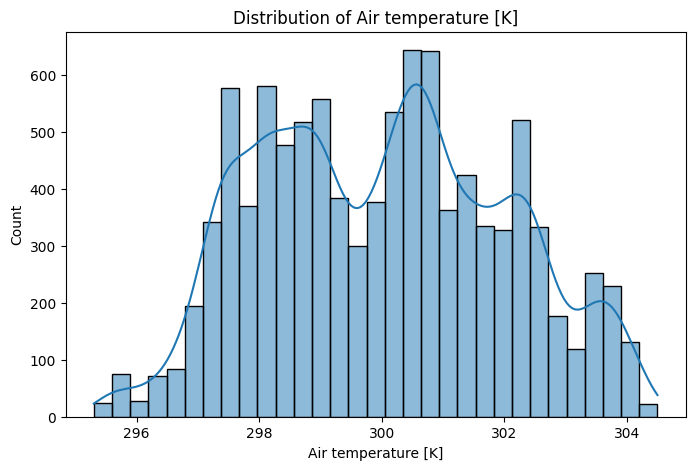

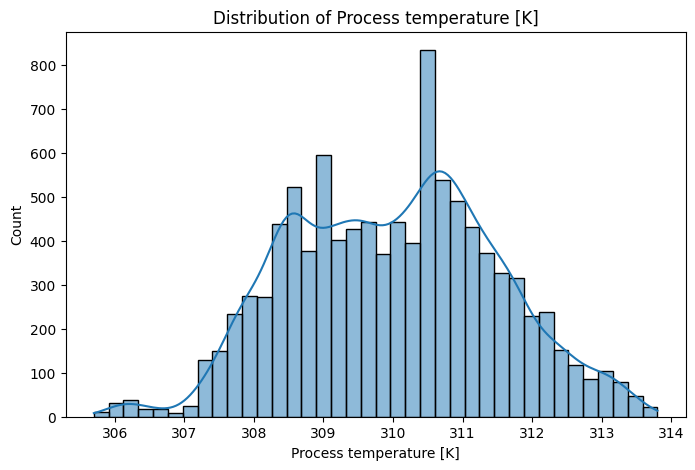

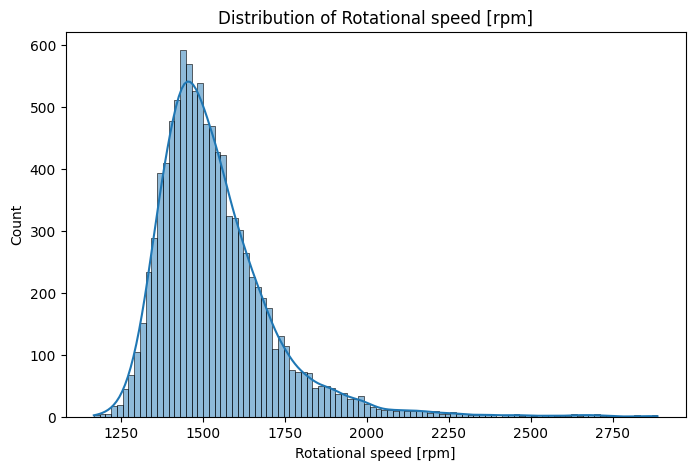

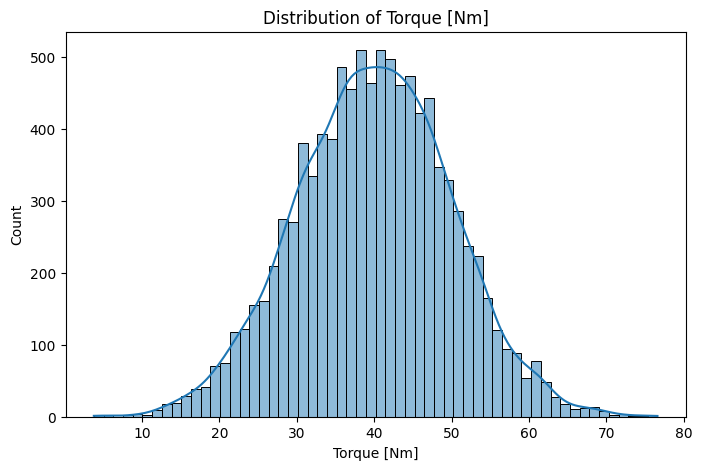

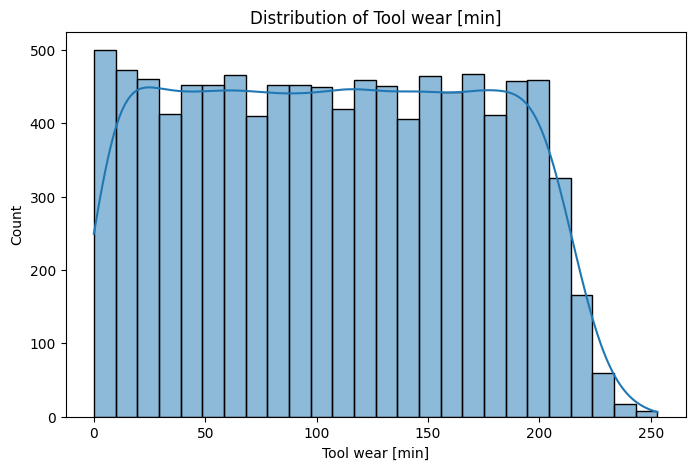

In [5]:
num_cols = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]"
]

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


### Air Temperature Distribution
The air temperature shows an approximately normal distribution with a narrow operating range. No extreme or physically implausible values are observed, indicating stable environmental conditions and good data quality. This variable does not exhibit obvious anomalies requiring cleaning.


### Process Temperature Distribution
Process temperature displays slightly greater variability than air temperature, which is expected in industrial settings. The distribution remains within realistic operational limits, suggesting potential relevance to machine stress without indicating data quality issues.


### Rotational Speed Distribution
Rotational speed exhibits a right-skewed distribution with a long tail of higher RPM values. These higher-speed observations likely represent real operating scenarios and may be associated with increased mechanical stress rather than data errors.


### Torque Distribution
Torque values follow an approximately normal distribution centered around moderate load levels. The symmetry and continuity of the distribution suggest consistent operational loading across machines, making torque a strong candidate predictor.


### Tool Wear Distribution
Tool wear appears uniformly distributed across its range, reflecting machines observed at various stages of tool lifecycle. No invalid or unexpected values are present, indicating reliable measurement and strong predictive potential.


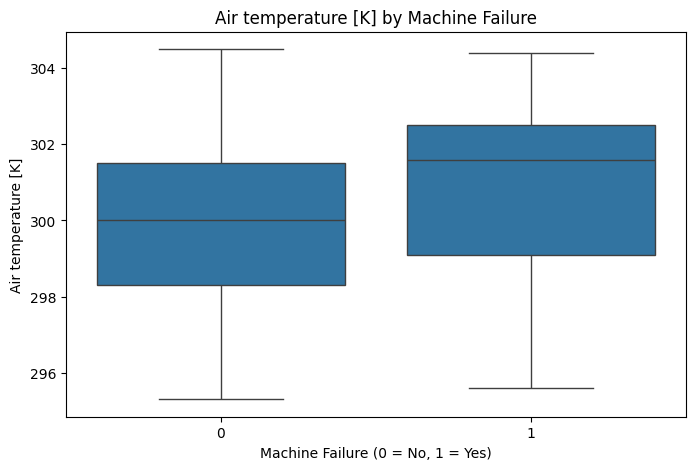

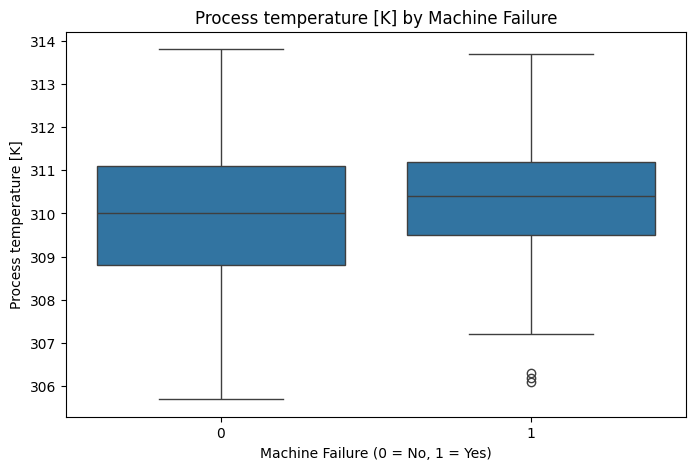

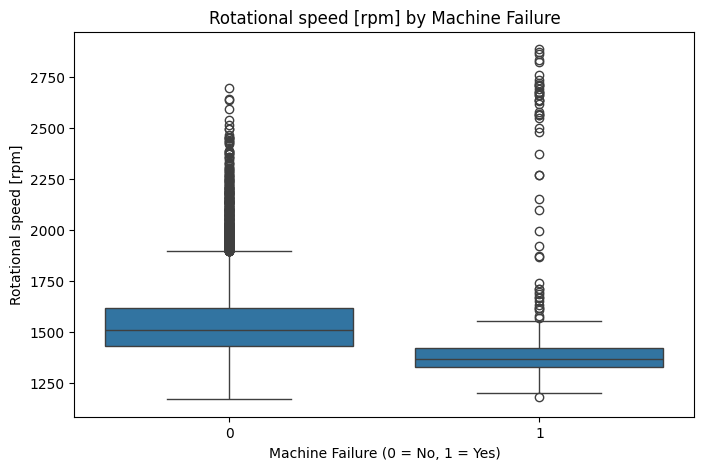

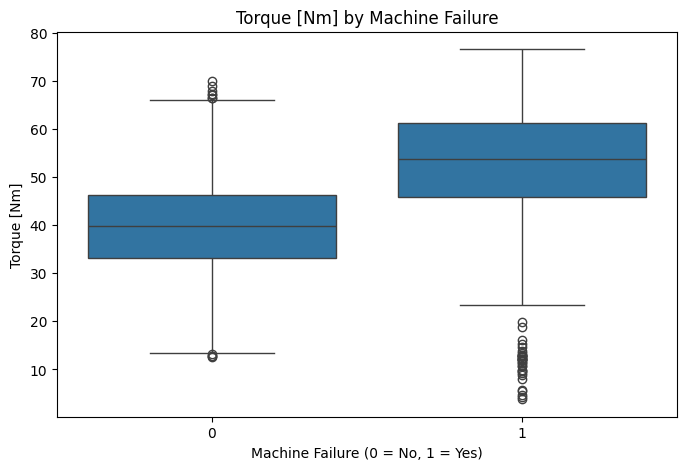

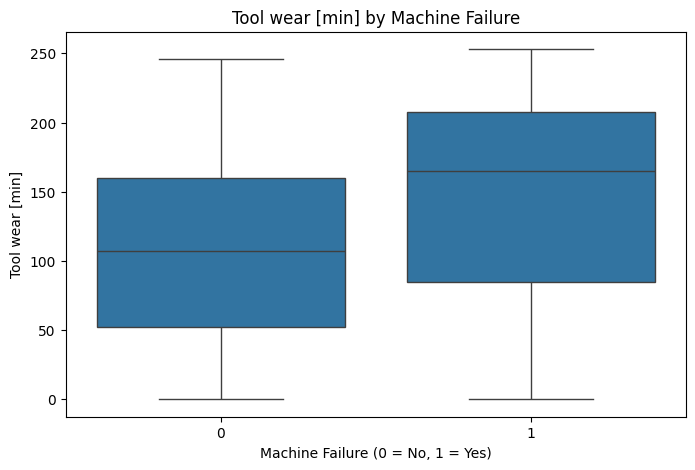

In [6]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x="Machine failure", y=col, data=df)
    plt.xlabel("Machine Failure (0 = No, 1 = Yes)")
    plt.title(f"{col} by Machine Failure")
    plt.show()


### Air Temperature vs Machine Failure
Machines that experienced failure show a slightly higher median air temperature compared to non-failure cases. However, substantial overlap exists between the two groups, suggesting air temperature alone is not a dominant failure driver.


### Process Temperature vs Machine Failure
Process temperature demonstrates a modest upward shift in failure cases. While the separation is limited, this suggests elevated process temperatures may contribute to failure risk under certain operating conditions.


### Rotational Speed vs Machine Failure
Failure cases tend to operate at lower median rotational speeds while also exhibiting more extreme high-RPM events. This pattern may indicate unstable or fluctuating operating regimes preceding machine failure.


### Torque vs Machine Failure
Torque shows a clear and substantial increase in failure cases compared to non-failure cases. This strong separation indicates that higher mechanical load is a significant contributor to machine failure.


### Tool Wear vs Machine Failure
Tool wear displays the strongest separation between failure and non-failure cases, with significantly higher median wear observed in failed machines. This confirms tool wear as a primary predictor of machine failure.


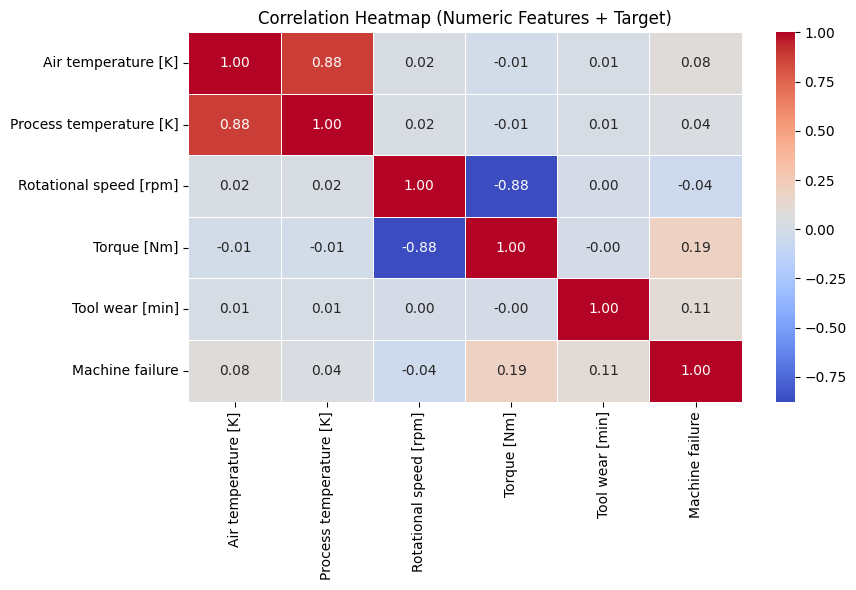

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]",
    "Machine failure"
]

corr = df[num_cols].corr()

plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features + Target)")
plt.tight_layout()
plt.show()


### Correlation Analysis (Numeric Features + Target)

The correlation heatmap highlights several important relationships among the operational variables and the target variable (machine failure):

- **Air temperature and process temperature** exhibit a very strong positive correlation (~0.88), indicating they move together under normal operating conditions. This suggests potential multicollinearity, which should be considered during modeling.
- **Rotational speed and torque** show a strong negative correlation (~-0.88), reflecting the physical trade-off between speed and load in machine operations.
- Correlations between most individual sensor variables and **machine failure** are relatively weak in isolation. However, **torque (~0.19)** and **tool wear (~0.11)** show the highest positive correlations with failure, indicating their importance as contributing factors.
- The relatively low linear correlations with the target suggest that non-linear models may be better suited to capture complex failure patterns.


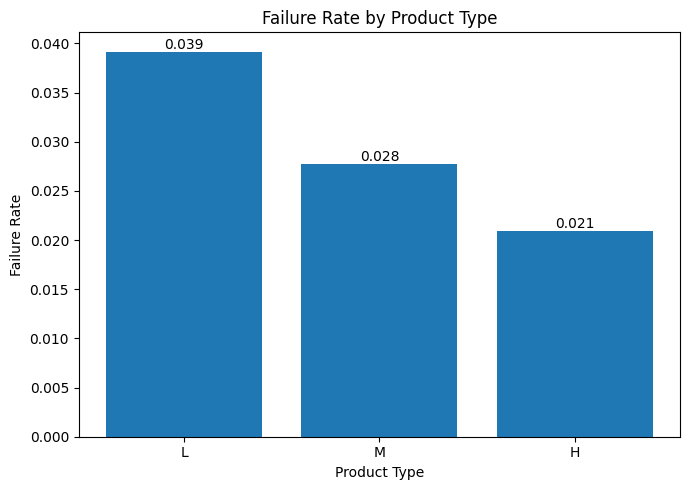

In [8]:
failure_by_type = (
    df.groupby("Type")["Machine failure"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(7, 5))
bars = plt.bar(failure_by_type.index, failure_by_type.values)

# Add labels on top of bars
for bar, val in zip(bars, failure_by_type.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{val:.3f}",
        ha="center",
        va="bottom"
    )

plt.title("Failure Rate by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Failure Rate")
plt.tight_layout()
plt.show()


### Failure Rate by Product Type

Failure rates vary across product types, with **Type L** exhibiting the highest failure rate (~3.9%), followed by **Type M** (~2.8%), and **Type H** showing the lowest failure rate (~2.1%).

This variation suggests that product characteristics influence operational stress and failure likelihood. Product type should therefore be treated as an important categorical variable and encoded appropriately during the modeling phase.


## Overall EDA Conclusions

Exploratory analysis indicates that machine failure is strongly associated with operational stress indicators such as torque, tool wear, and rotational speed. While individual linear correlations with failure are modest, distributional differences between failure and non-failure cases suggest meaningful non-linear relationships. Observed patterns reflect genuine operating behavior rather than data quality issues, and therefore no aggressive outlier removal is justified prior to modeling.
